## **DBSCAN* Martingale for community detection**

In [1]:
#import libraries
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import rand_score, normalized_mutual_info_score
import random
import pandas as pd

In [2]:
from dbscan_martingale import DBSCAN_Martingale
from utils import load_synth_graph, plot, random_color, group_indices

## **Tests**

## **1.   LFR1 Dataset**:

  The parameters of this dataset are:

  *  650 node
  *  minimum community size 20
  *  community size power-law fit beta = 1.89 (p-value =0.16 > 0.05)
  *  degree distribution power-law fit gamma= 3.54 (p-value = 0.29 > 0.05)
  *  maximum degree= 13

In [3]:
# Define the graph
G1, ground_truth1 = load_synth_graph("Datasets/lfr1/")

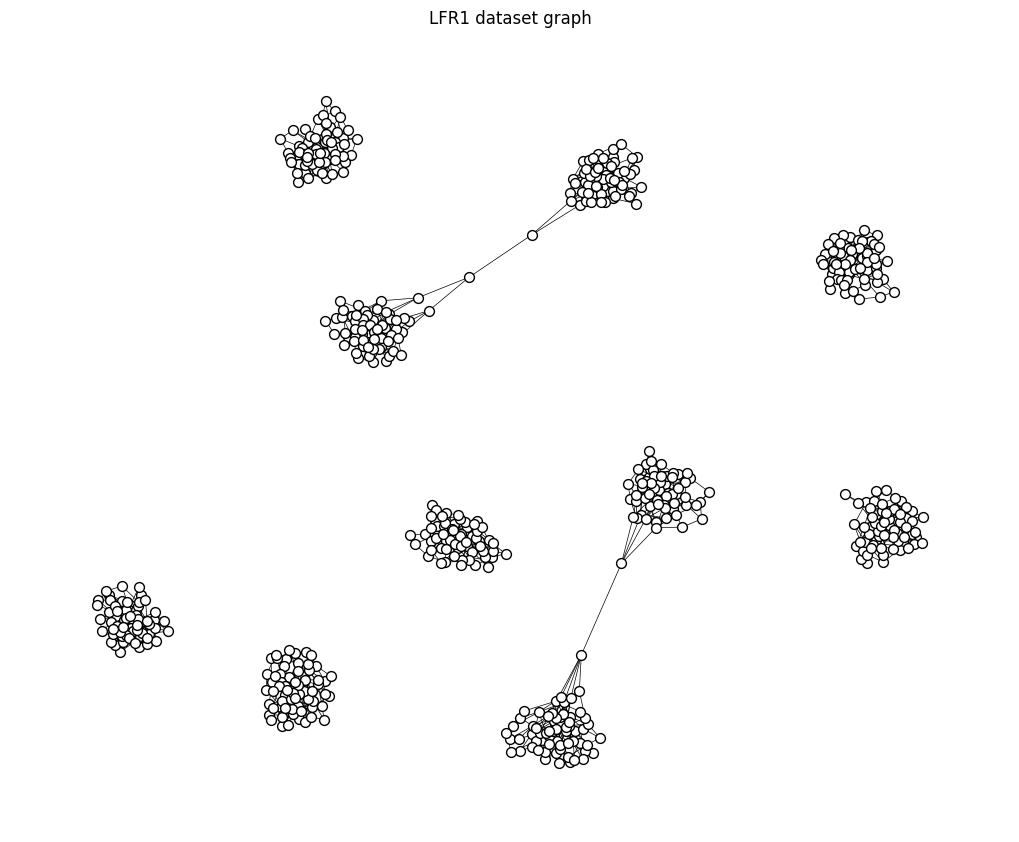

In [4]:
# Plot the LFR1 graph
plot(G1,title= "LFR1 dataset graph")

Run DBSCAN* martingale (for one execution set **realizations = 0**)

In [5]:
# =================================== Define parameters ===================================
eps = 1
S = 5 # size of Minpts sample
realizations = 10
MinPts = range(5,30)
dbscan_star = DBSCAN_Martingale()

# =================================== Run DBSCAN* Martingale ===================================
principal_clustering_all1, df_stat1, n_clusters1, cluster_probabilities1 = dbscan_star.fit_predict(G1, eps, MinPts, S, realizations, ground_truth1)

Starting execution
Execution finished


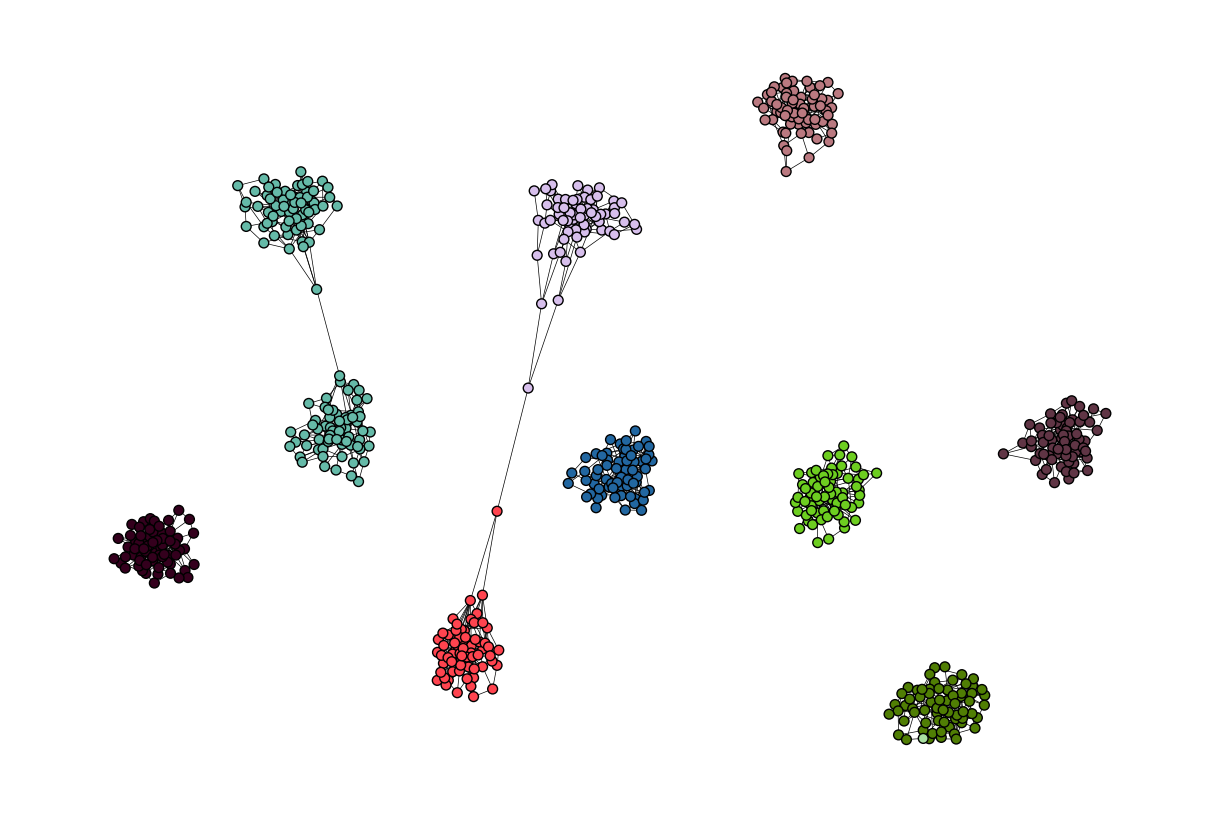

In [6]:
# plot the final clustering of the best realization in terms of NMI
max_nmi_idx = df_stat1['NMI'].idxmax()
unique_elements = np.unique(principal_clustering_all1[max_nmi_idx])
colors = {int(label): random_color() for label in unique_elements}
labels = np.array(principal_clustering_all1[max_nmi_idx])
labels = labels[list(G1.nodes)]
colors = [colors[label] for label in labels]
plt.figure(figsize=(12,8))
nx.draw(G1, pos=nx.spring_layout(G1), node_color=colors, node_size=50,
        font_color="white",
        font_size=10,
        width=0.5,
        edgecolors='black',  # Set edge color to black
    )
plt.show()

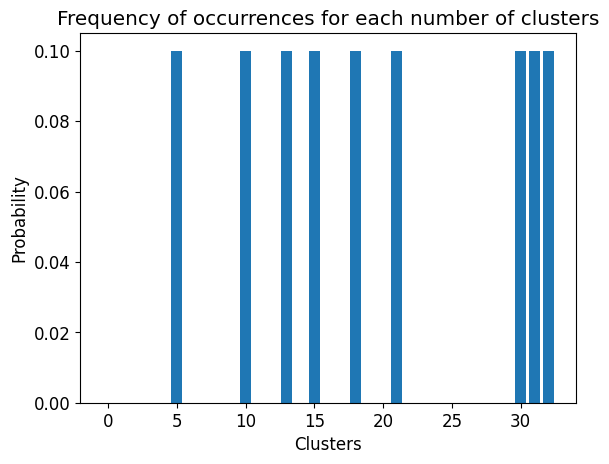

In [7]:
# Probability distribution - barplot
plt.rcParams.update({'font.size': 12})
plt.bar(n_clusters1, cluster_probabilities1)
plt.xlabel("Clusters")
plt.ylabel("Probability")
plt.title("Frequency of occurrences for each number of clusters")
plt.show()

In [8]:
# Averge NMI and RAND scores
print(f"NMI average: {np.mean(df_stat1.loc[df_stat1.iloc[:, 0] != 0, 'NMI'])}")
print(f"RAND average: {np.mean(df_stat1.loc[df_stat1.iloc[:, 0] != 0, 'RAND'])}")

NMI average: 0.8688864815554598
RAND average: 0.9466592917440375


In [9]:
# Number of cluster / NMI score / RAND score for each realization
df_stat1

,C,NMI,RAND
0,0.0,0.000000,0.098613
1,32.0,0.831093,0.947398
2,30.0,0.837352,0.947977
3,15.0,0.942968,0.981676
4,13.0,0.893710,0.962755
5,10.0,0.967241,0.979666
6,21.0,0.877875,0.960559
7,31.0,0.830795,0.949062
8,5.0,0.770798,0.837146
9,18.0,0.868147,0.953694


In [10]:
# The best realization that score the highest NMI and RAND scores
max_nmi_idx = df_stat1['NMI'].idxmax()
max_rand_idx = df_stat1['RAND'].idxmax()
row_highest_nmi = df_stat1.loc[max_nmi_idx]
row_highest_rand = df_stat1.loc[max_rand_idx]
print(f"Realization {max_nmi_idx+1} with the highest NMI:")
print(f"Number of clusters: {df_stat1.loc[max_nmi_idx, 'C'].astype(int)}")
print(f"NMI: {df_stat1.loc[max_nmi_idx, 'NMI']}")
print(f"RAND: {df_stat1.loc[max_nmi_idx, 'RAND']}")
print()

print(f"Realization {max_rand_idx+1} with the highest RAND:")
print(f"Number of clusters: {df_stat1.loc[max_rand_idx, 'C'].astype(int)}")
print(f"NMI: {df_stat1.loc[max_rand_idx, 'NMI']}")
print(f"RAND: {df_stat1.loc[max_rand_idx, 'RAND']}")

Realization 6 with the highest NMI:
Number of clusters: 10
NMI: 0.9672413717668149
RAND: 0.9796657579708428

Realization 4 with the highest RAND:
Number of clusters: 15
NMI: 0.9429676125453686
RAND: 0.9816759511674766


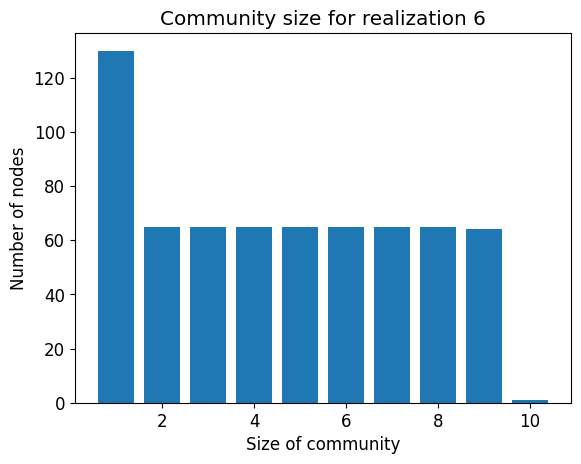

In [11]:
# Community size in the best realization
unique_elements, counts = np.unique(principal_clustering_all1[max_nmi_idx], return_counts=True)
counts = sorted(counts, key=lambda x: -x)
plt.rcParams.update({'font.size': 12})
plt.bar(x=unique_elements, height=counts)
plt.title(f"Community size for realization {max_nmi_idx + 1}")
plt.xlabel("Size of community")
plt.ylabel("Number of nodes")
plt.show()

In [12]:
# Modularity
communities = principal_clustering_all1[max_nmi_idx].astype(int)
result = group_indices(communities)
modularity = nx.community.modularity(G1, result)
print("Modularity:", modularity)

Modularity: 0.8772974190667739


## **Polbooks Dataset**


In [13]:
# Define the graph
G = nx.read_gml('Datasets/polbooks.gml', label=None)
G.nodes
mapping = dict(zip(G, range(0, len(G.nodes))))
G = nx.relabel_nodes(G, mapping)

In [14]:
#define ground truth
ground_truth = np.array([0,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,2,2,1,1,1,1,
                         1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,0,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,
                         0,2,2,2,2,2,2,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0])

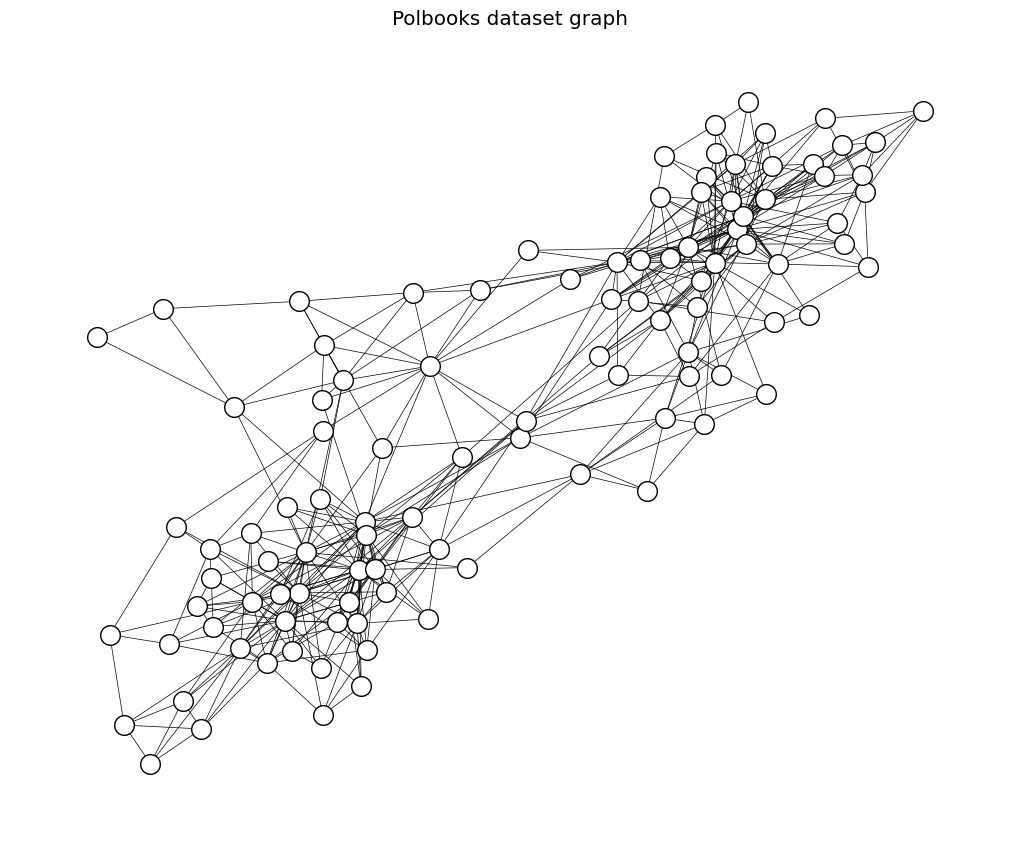

In [15]:
# Plot Polbooks graph
plot(G,node_size=200, title= "Polbooks dataset graph")

Run DBSCAN* martingale (for one execution set **realizations = 0**)

In [16]:
# =================================== Define parameters ===================================
eps = 1
S = 5 # size of Minpts sample
realizations = 10
MinPts = range(5,15)
dbscan_star = DBSCAN_Martingale()

# =================================== Run DBSCAN* Martingale ===================================
principal_clustering_all, df_stat, n_clusters, cluster_probabilities = dbscan_star.fit_predict(G, eps, MinPts, S, realizations, ground_truth)

Starting execution
Execution finished


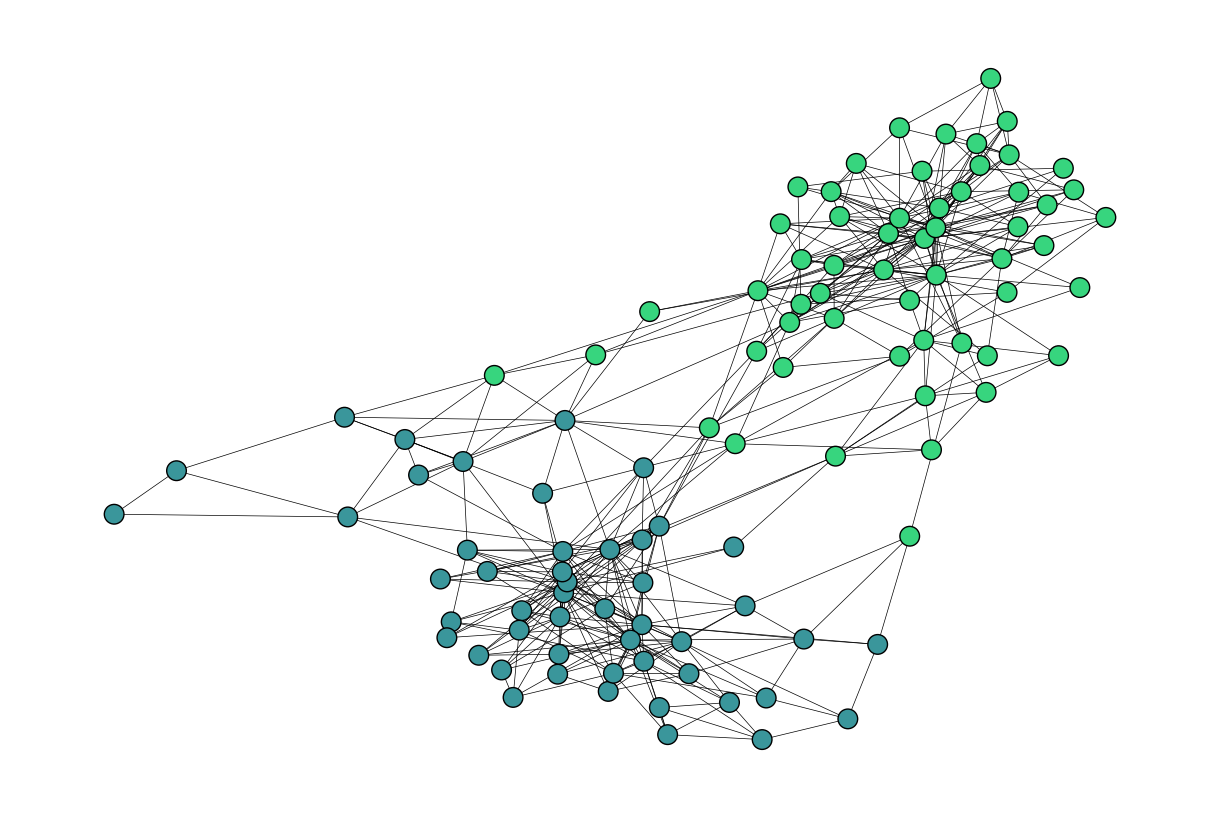

In [17]:
# plot the final clustering of the best realization in terms of NMI
max_nmi_idx = df_stat['NMI'].idxmax()
unique_elements = np.unique(principal_clustering_all[max_nmi_idx])
colors = {int(label): random_color() for label in unique_elements}
labels = np.array(principal_clustering_all[max_nmi_idx])
labels = labels[list(G.nodes)]
colors = [colors[label] for label in labels]
plt.figure(figsize=(12,8))
nx.draw(G, pos=nx.spring_layout(G), node_color=colors, node_size=200,
        font_color="white",
        font_size=10,
        width=0.5,
        edgecolors='black',  # Set edge color to black
    )
plt.show()

In [18]:
# Averge NMI and RAND scores
print(f"NMI average: {np.mean(df_stat.loc[df_stat.iloc[:, 0] != 0, 'NMI'])}")
print(f"RAND average: {np.mean(df_stat.loc[df_stat.iloc[:, 0] != 0, 'RAND'])}")

NMI average: 0.5241466421092044
RAND average: 0.819981684981685


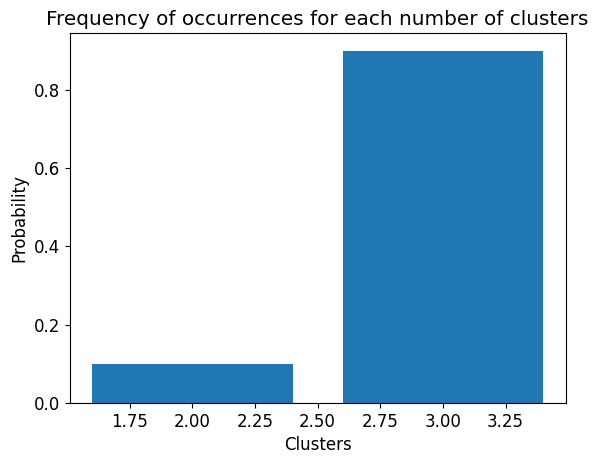

In [19]:
# Probability distribution - barplot
plt.rcParams.update({'font.size': 12})
plt.bar(n_clusters, cluster_probabilities)
plt.xlabel("Clusters")
plt.ylabel("Probability")
plt.title("Frequency of occurrences for each number of clusters")
plt.show()

In [20]:
# Number of cluster / NMI score / RAND score for each realization
df_stat

,C,NMI,RAND
0,2.0,0.578894,0.833150
1,3.0,0.517444,0.821429
2,3.0,0.538512,0.829304
3,3.0,0.517444,0.821429
4,3.0,0.517444,0.821429
5,3.0,0.517444,0.821429
6,3.0,0.517444,0.821429
7,3.0,0.512281,0.810073
8,3.0,0.512281,0.810073
9,3.0,0.512281,0.810073


In [21]:
# The best realization that score the highest NMI and RAND scores
max_nmi_idx = df_stat['NMI'].idxmax()
max_rand_idx = df_stat['RAND'].idxmax()
row_highest_nmi = df_stat.loc[max_nmi_idx]
row_highest_rand = df_stat.loc[max_rand_idx]
print(f"Realization {max_nmi_idx+1} with the highest NMI:")
print(f"Number of clusters: {df_stat.loc[max_nmi_idx, 'C'].astype(int)}")
print(f"NMI: {df_stat.loc[max_nmi_idx, 'NMI']}")
print(f"RAND: {df_stat.loc[max_nmi_idx, 'RAND']}")
print()

print(f"Realization {max_rand_idx+1} with the highest RAND:")
print(f"Number of clusters: {df_stat.loc[max_rand_idx, 'C'].astype(int)}")
print(f"NMI: {df_stat.loc[max_rand_idx, 'NMI']}")
print(f"RAND: {df_stat.loc[max_rand_idx, 'RAND']}")

Realization 1 with the highest NMI:
Number of clusters: 2
NMI: 0.578893820972015
RAND: 0.8331501831501832

Realization 1 with the highest RAND:
Number of clusters: 2
NMI: 0.578893820972015
RAND: 0.8331501831501832


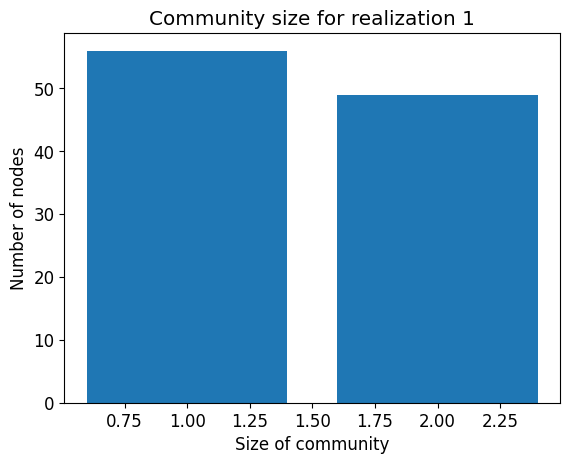

In [22]:
# Community size in the best realization
unique_elements, counts = np.unique(principal_clustering_all[max_nmi_idx], return_counts=True)
counts = sorted(counts, key=lambda x: -x)
plt.rcParams.update({'font.size': 12})
plt.bar(x=unique_elements, height=counts)
plt.title(f"Community size for realization {max_nmi_idx + 1}")
plt.xlabel("Size of community")
plt.ylabel("Number of nodes")
plt.show()

In [23]:
# Modularity
communities = principal_clustering_all[max_nmi_idx].astype(int)
result = group_indices(communities)
modularity = nx.community.modularity(G, result)
print("Modularity:", modularity)

Modularity: 0.4446501200631424
